In [42]:
import sys
import os
import numpy as np
from scipy.interpolate import interp1d
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['text.usetex'] = True

In [43]:
sys.path.append(r"C:\Users\d80084\Google Drive\01oxford\7 Thesis\code\quasigaussian")

In [44]:
from quassigaussian.montecarlo.simulations import ProcessSimulator
from quassigaussian.volatility.local_volatility import LinearLocalVolatility, BlackVolatilityModel 
from quassigaussian.ploting.plot_approximations import ApproximatorPlotter
from quassigaussian.products.pricer import AnnuityPricer, BondPricer, SwapPricer, SwaptionPricer
from quassigaussian.products.instruments import Annuity, Swap, Swaption
from quassigaussian.montecarlo.monte_carlo_pricer import monte_carlo_pricer

In [45]:
from qgtests.utis import get_mock_yield_curve_const

In [46]:
kappa = 0.3
rate = 0.06
time_grid = np.arange(0, 31)
y = np.ones(31)*0.1
initial_curve = get_mock_yield_curve_const(rate)

lambda_t = interp1d(time_grid, y, kind='previous')
alpha_t = interp1d(time_grid, y, kind='previous')
b_t = interp1d(time_grid, y, kind='previous')

linear_local  = LinearLocalVolatility.from_const(30, 0.1, 0.1, 0.1)

swap_pricer = SwapPricer(initial_curve, kappa=kappa)


In [47]:
swap_T0 = 4
swap_TN = 5
frequency = 0.5
coupon = 0.062

In [48]:
number_samples = 600
number_steps = 100

t_horizon = swap_T0
dt = t_horizon/number_steps


In [49]:
bond_pricer = BondPricer(initial_curve, kappa)
annuity_pricer = AnnuityPricer(bond_pricer)
swap = Swap(swap_T0, swap_TN, frequency)
annuity = Annuity(swap.bond_list, frequency)
swaption = Swaption(swap_T0, coupon, swap)
swaption_pricer = SwaptionPricer(swap_pricer)

In [50]:
# log_vola = 0.2
# black_non_linear_vola = BlackVolatilityModel(log_vola, swap, swap_pricer)

In [51]:
x_simulator = ProcessSimulator(number_samples, number_steps, dt, annuity_pricer)

In [52]:
local_volatility = linear_local

In [53]:
#res = x_simulator.simulate_xy(kappa=kappa, local_volatility=local_volatility)

In [54]:
res2 = x_simulator.simulate_xy(kappa=kappa, local_volatility=local_volatility, annuity_measure=annuity)

Simulation: 0
Simulation: 1
Simulation: 2
Simulation: 3
Simulation: 4
Simulation: 5
Simulation: 6
Simulation: 7
Simulation: 8
Simulation: 9
Simulation: 10
Simulation: 11
Simulation: 12
Simulation: 13
Simulation: 14
Simulation: 15
Simulation: 16
Simulation: 17
Simulation: 18
Simulation: 19
Simulation: 20
Simulation: 21
Simulation: 22
Simulation: 23
Simulation: 24
Simulation: 25
Simulation: 26
Simulation: 27
Simulation: 28
Simulation: 29
Simulation: 30
Simulation: 31
Simulation: 32
Simulation: 33
Simulation: 34
Simulation: 35
Simulation: 36
Simulation: 37
Simulation: 38
Simulation: 39
Simulation: 40
Simulation: 41
Simulation: 42
Simulation: 43
Simulation: 44
Simulation: 45
Simulation: 46
Simulation: 47
Simulation: 48
Simulation: 49
Simulation: 50
Simulation: 51
Simulation: 52
Simulation: 53
Simulation: 54
Simulation: 55
Simulation: 56
Simulation: 57
Simulation: 58
Simulation: 59
Simulation: 60
Simulation: 61
Simulation: 62
Simulation: 63
Simulation: 64
Simulation: 65
Simulation: 66
Simul

Simulation: 521
Simulation: 522
Simulation: 523
Simulation: 524
Simulation: 525
Simulation: 526
Simulation: 527
Simulation: 528
Simulation: 529
Simulation: 530
Simulation: 531
Simulation: 532
Simulation: 533
Simulation: 534
Simulation: 535
Simulation: 536
Simulation: 537
Simulation: 538
Simulation: 539
Simulation: 540
Simulation: 541
Simulation: 542
Simulation: 543
Simulation: 544
Simulation: 545
Simulation: 546
Simulation: 547
Simulation: 548
Simulation: 549
Simulation: 550
Simulation: 551
Simulation: 552
Simulation: 553
Simulation: 554
Simulation: 555
Simulation: 556
Simulation: 557
Simulation: 558
Simulation: 559
Simulation: 560
Simulation: 561
Simulation: 562
Simulation: 563
Simulation: 564
Simulation: 565
Simulation: 566
Simulation: 567
Simulation: 568
Simulation: 569
Simulation: 570
Simulation: 571
Simulation: 572
Simulation: 573
Simulation: 574
Simulation: 575
Simulation: 576
Simulation: 577
Simulation: 578
Simulation: 579
Simulation: 580
Simulation: 581
Simulation: 582
Simulati

In [55]:
res2.x.shape

(600, 101)

In [56]:
res2.x[-1,:]

array([ 0.        , -0.00039123,  0.00204731,  0.00392234,  0.00294767,
        0.00518228,  0.00416107,  0.00444918,  0.00485822,  0.00530505,
        0.00378627,  0.0028659 ,  0.00427752,  0.00733764,  0.00626765,
        0.01116302,  0.01207427,  0.00967193,  0.0085616 ,  0.00554357,
        0.00079765,  0.00165056,  0.00248232,  0.00366385,  0.00598563,
        0.00810764,  0.00696599,  0.00238393,  0.00148038,  0.00236311,
       -0.00281617, -0.00491714, -0.00458186, -0.00492567, -0.00794033,
       -0.00876442, -0.00715455, -0.00383641,  0.00079879,  0.00058391,
        0.00022049,  0.00505461,  0.00560029,  0.0070391 ,  0.00596507,
        0.00858828,  0.00953264,  0.00874783,  0.01159359,  0.01560088,
        0.01797441,  0.01504714,  0.01789462,  0.01499404,  0.00943449,
        0.012841  ,  0.00954093,  0.01236673,  0.01346626,  0.01297163,
        0.0155926 ,  0.01549078,  0.01536697,  0.01822431,  0.01912831,
        0.01728633,  0.01427442,  0.01359756,  0.01076327,  0.01

In [57]:
res2.x[:,-1]

array([ 1.06552357e-02,  1.33937205e-02,  8.85951713e-04, -1.50257293e-02,
        5.78317388e-03, -4.28445260e-03, -1.45544154e-02,  1.19217425e-02,
       -1.21398039e-03, -9.83157112e-03,  1.31146535e-02, -3.56843597e-03,
        9.59866684e-03,  5.77739124e-03, -7.65140584e-03,  3.35008164e-03,
       -2.08271240e-03,  5.89403092e-03, -2.64120765e-02, -1.11994031e-02,
        1.74166079e-02,  9.05289667e-03, -3.21827231e-03, -3.15895565e-03,
       -1.43944565e-02, -4.90562895e-03,  1.03595920e-02,  9.13988055e-03,
        1.25074435e-02, -6.04537342e-03,  1.66960897e-02, -1.29272997e-02,
       -5.03809826e-03, -7.66778618e-03,  5.29776326e-04, -3.69452013e-03,
        2.37491199e-03,  6.31316347e-03,  9.89846928e-03,  2.32654827e-02,
       -7.94635897e-03,  1.98247331e-02,  1.16646611e-02, -7.66524533e-03,
       -1.26421926e-02, -1.60192034e-02, -2.03318682e-03,  1.34347157e-02,
        1.00809055e-02,  4.55083743e-04, -2.31481259e-03,  5.68788531e-03,
        3.64832731e-03, -

In [58]:
bond_simuation = annuity_pricer.annuity_price(0, 0, 0, annuity) * 1/annuity_pricer.annuity_price(t_horizon, res2.x[:, -1], res2.y[:, -1], annuity)

In [59]:
np.exp(-rate*swap_T0)

0.7866278610665535

In [60]:
np.mean(bond_simuation)

0.7869754160729113

In [61]:
np.std(bond_simuation)*3/np.sqrt(number_samples)

0.0007619233304847665

In [62]:
expected_bond_annuity = 1/annuity_pricer.annuity_price(t_horizon, res2.x[:, -1], res2.y[:, -1], annuity)

In [63]:
np.std(expected_bond_annuity)*3/np.sqrt(200)

0.0017546761395730687

In [64]:
avg_bond =  annuity_pricer.annuity_price(0, 0, 0, annuity) * np.mean(expected_bond_annuity)

In [65]:
np.exp(-0.06)

0.9417645335842487

In [66]:
np.mean(avg_bond)

0.7869754160729112

In [67]:
mc_price = monte_carlo_pricer(res2, swaption, swaption_pricer)

In [68]:
res2.x[:, -1]

array([ 1.06552357e-02,  1.33937205e-02,  8.85951713e-04, -1.50257293e-02,
        5.78317388e-03, -4.28445260e-03, -1.45544154e-02,  1.19217425e-02,
       -1.21398039e-03, -9.83157112e-03,  1.31146535e-02, -3.56843597e-03,
        9.59866684e-03,  5.77739124e-03, -7.65140584e-03,  3.35008164e-03,
       -2.08271240e-03,  5.89403092e-03, -2.64120765e-02, -1.11994031e-02,
        1.74166079e-02,  9.05289667e-03, -3.21827231e-03, -3.15895565e-03,
       -1.43944565e-02, -4.90562895e-03,  1.03595920e-02,  9.13988055e-03,
        1.25074435e-02, -6.04537342e-03,  1.66960897e-02, -1.29272997e-02,
       -5.03809826e-03, -7.66778618e-03,  5.29776326e-04, -3.69452013e-03,
        2.37491199e-03,  6.31316347e-03,  9.89846928e-03,  2.32654827e-02,
       -7.94635897e-03,  1.98247331e-02,  1.16646611e-02, -7.66524533e-03,
       -1.26421926e-02, -1.60192034e-02, -2.03318682e-03,  1.34347157e-02,
        1.00809055e-02,  4.55083743e-04, -2.31481259e-03,  5.68788531e-03,
        3.64832731e-03, -

In [69]:
mc_price.shape

(600,)

In [70]:
mc_price.mean()

0.0028629628103225883

In [71]:
mc_price.mean() + 3*mc_price.std()/np.sqrt(res2.x.shape[0])

0.0033645439982781505

In [72]:
mc_price.mean() - 3*mc_price.std()/np.sqrt(res2.x.shape[0])

0.002361381622367026

In [73]:
mc_price.mean() + 3*mc_price.std()/np.sqrt(res2.x.shape[0])

0.0033645439982781505

In [74]:
mc_price.mean() - 3*mc_price.std()/np.sqrt(res2.x.shape[0])

0.002361381622367026

In [75]:
######################################################

In [76]:
approximation_plotter = ApproximatorPlotter()

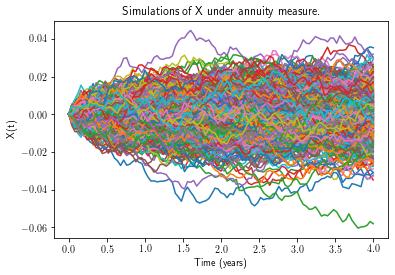

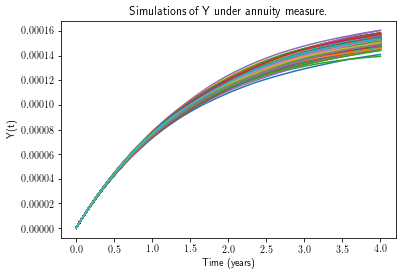

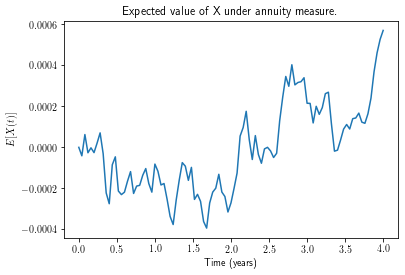

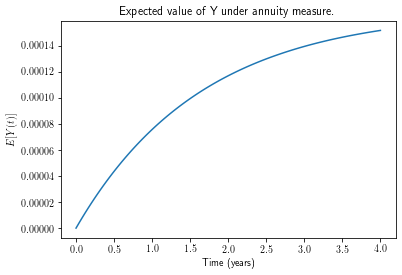

In [77]:
approximation_plotter.plot_xy_approximation(res2)

In [78]:
from quassigaussian.fastcalibration.approximation import PiterbargApproximator
sigma_r = LinearLocalVolatility(lambda_t, alpha_t, b_t)

piterbarg_approx = PiterbargApproximator(sigma_r, swap_pricer)

In [79]:
def test_pitebarg_approx(swap, time_grid):
    
    y_bar = np.zeros(len(time_grid))
    x0 = np.zeros(len(time_grid))
    x_bar = np.zeros(len(time_grid))
    
    swap_0 = piterbarg_approx.swap_pricer.price(swap, 0, 0, 0)
    for i in range(0,len(time_grid)):
        t = time_grid[i]
        y_bar[i] = piterbarg_approx._calculate_ybar(t)
        x0[i] = piterbarg_approx._calculate_x0(t, swap, swap_0, y_bar[i])
        x_bar[i] = piterbarg_approx._calculate_xbar(t, y_bar[i], swap, swap_0)

    return x0, x_bar, y_bar

In [80]:
x0, x_bar, y_bar = test_pitebarg_approx(swap, res2.time_grid)

Text(0, 0.5, '')

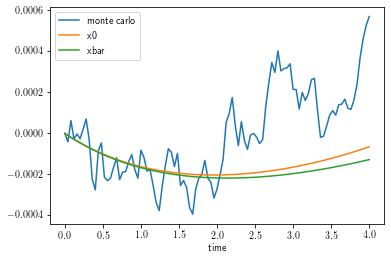

In [81]:
plt.figure()
plt.plot(res2.time_grid, res2.x_bar, label="monte carlo")
plt.plot(res2.time_grid, x0, label="x0")
plt.plot(res2.time_grid, x_bar, label="xbar")
plt.legend()
plt.xlabel("time")
plt.ylabel("")

Text(0, 0.5, 'y')

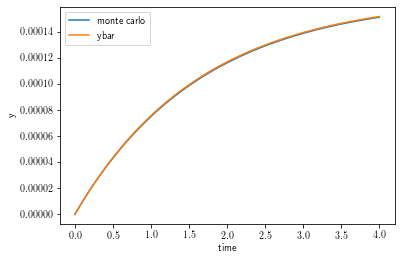

In [82]:
plt.figure()
plt.plot(res2.time_grid, y_bar, label="monte carlo")
plt.plot(res2.time_grid, res2.y_bar, label="ybar")
plt.legend()
plt.xlabel("time")
plt.ylabel("y")